# Projeto 2 - Predição de preços de casas

## House Prices - Advanced Regression Techniques
Peça a um comprador de imóveis para descrever a casa dos seus sonhos e eles provavelmente não começarão com a altura do teto do porão ou a proximidade de uma linha de trem. Mas este conjunto de dados prova que há muitos detalhes que influenciam as negociações de preços do que o número de quartos ou uma cerca branca.

### Sobre este projeto
Os principais pontos que serão avaliados:
- Levantamento de hipóteses
- Criação e seleção de características
- Manipulação de dados e criação de gráficos simples com o Pandas
- Criar um modelo de predição
- Apresentação dos resultados

### Preparação do ambiente
Para este projeto, acessem o link - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.

In [1]:
import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option("display.max_columns", None)

## Exercício
Neste projeto você deverá desenvolver a partir do que já vimos nos projetos anteriores, ou seja, poderá usar qualquer um dos modelos vistos durante as aulas. Siga este roteiro e preencha cada parte.

### 1. Análise exploratória de dados (1.0 ponto)
Realize a análise exploratória de dados. Observe cada variável, como se comportam em relação a outras variáveis independentes e com a variável dependente.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.drop(['Id'], axis=1, inplace=True)

Vamos explorar os preços de vendas (``SalePrice``).

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

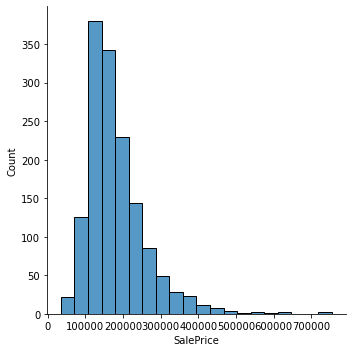

In [8]:
sns.displot(data=df['SalePrice'], bins=20);

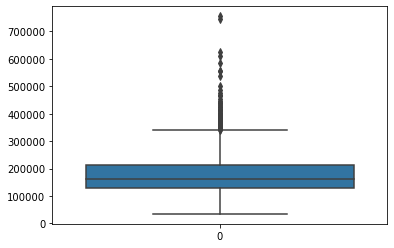

In [9]:
sns.boxplot(data=df['SalePrice']);

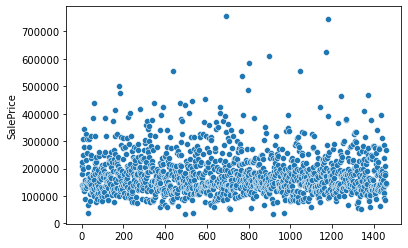

In [10]:
sns.scatterplot(data=df['SalePrice']);

In [11]:
df_corr = df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)
df_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [12]:
df_corr = df_corr[(df_corr < 1) & (df_corr > .3)].reset_index()
feat_names = df_corr['index']
feat_names

0      OverallQual
1        GrLivArea
2       GarageCars
3       GarageArea
4      TotalBsmtSF
5         1stFlrSF
6         FullBath
7     TotRmsAbvGrd
8        YearBuilt
9     YearRemodAdd
10     GarageYrBlt
11      MasVnrArea
12      Fireplaces
13      BsmtFinSF1
14     LotFrontage
15      WoodDeckSF
16        2ndFlrSF
17     OpenPorchSF
Name: index, dtype: object

In [13]:
buffer_labels = np.append(feat_names, 'SalePrice')
df_buffer = df[buffer_labels]

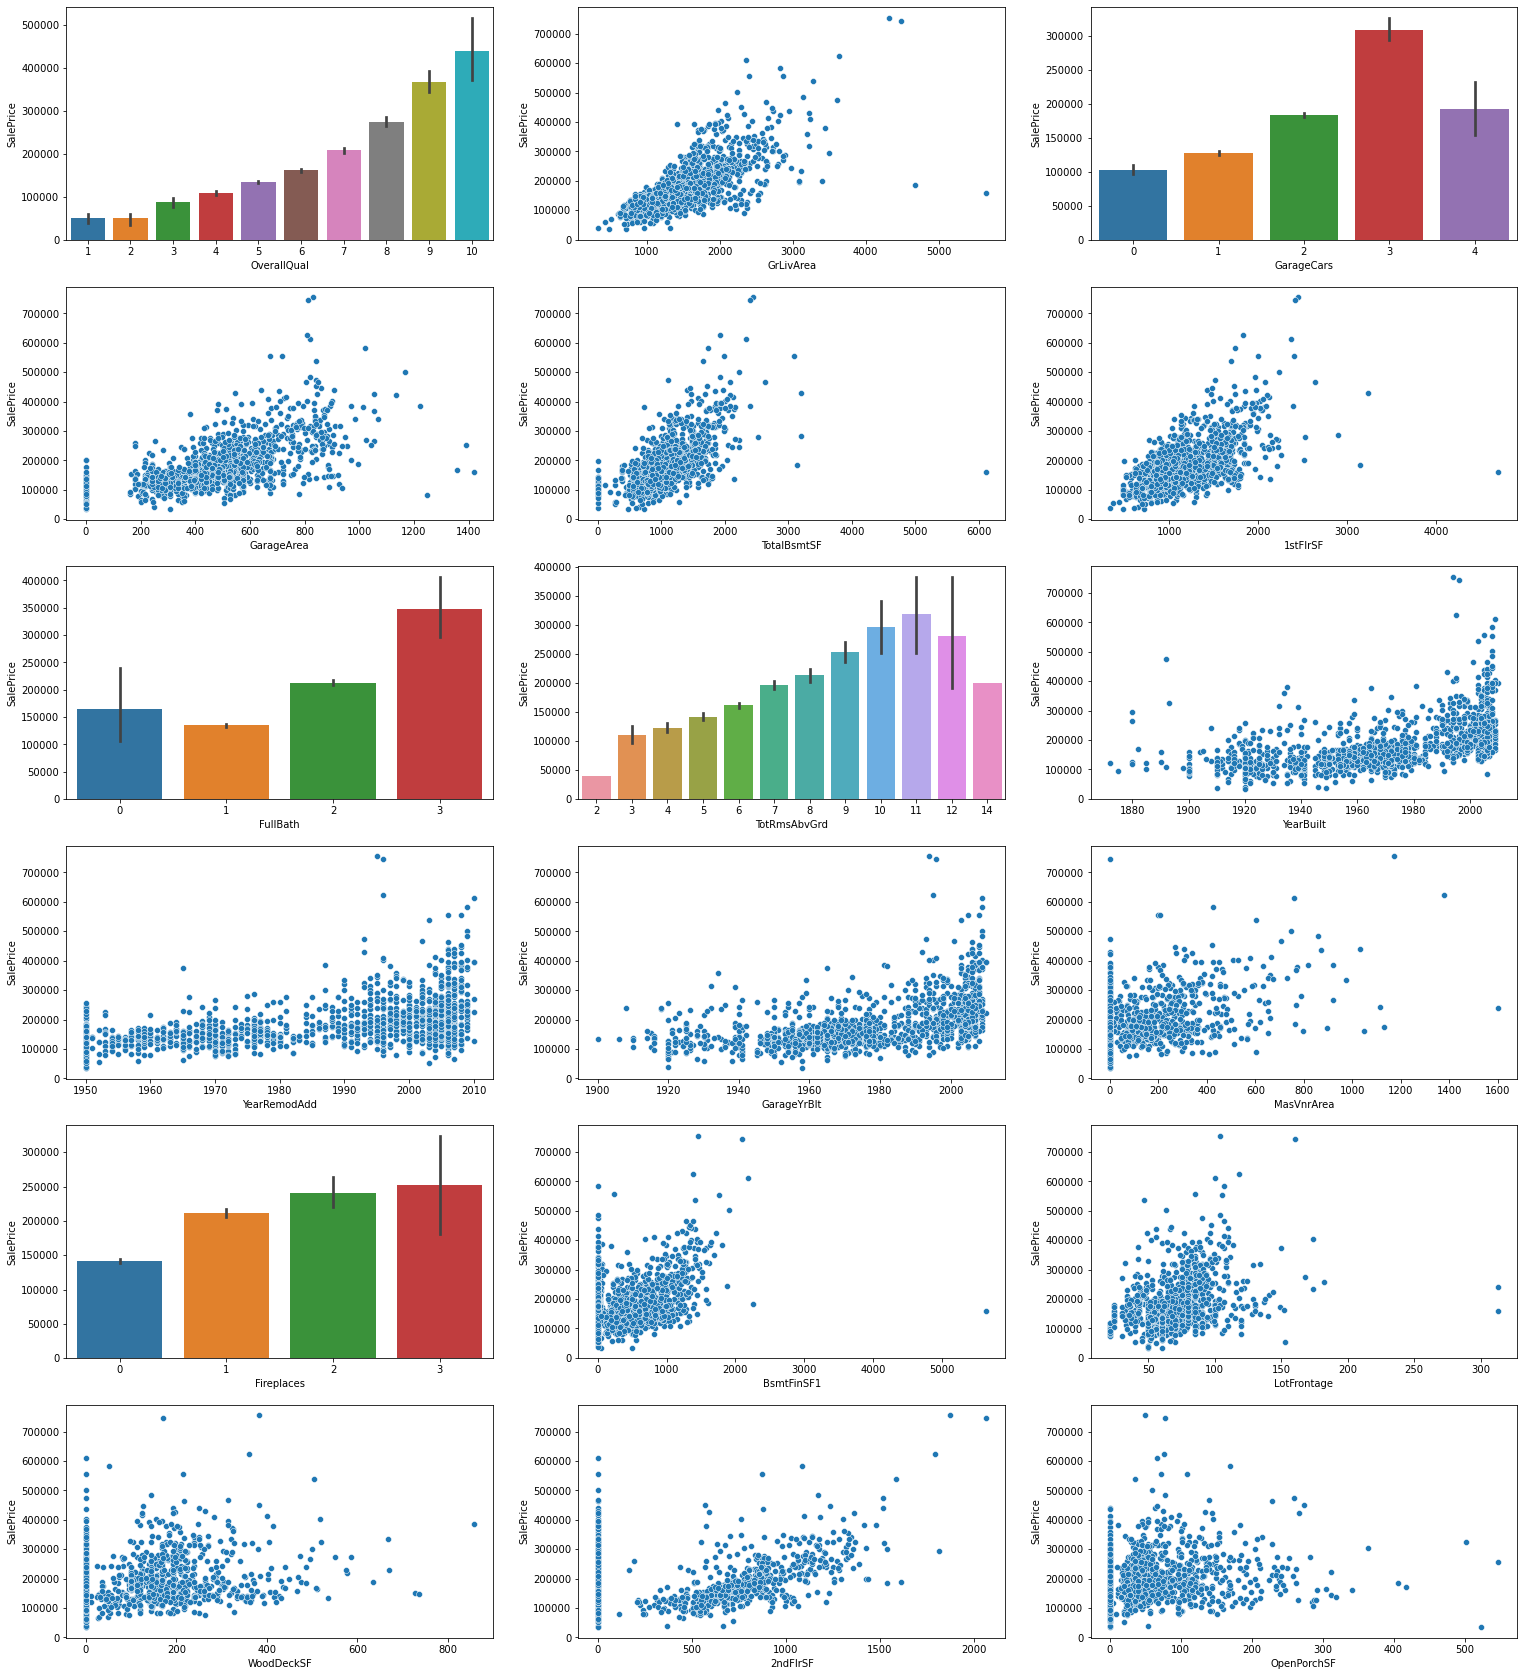

In [14]:
plt.figure(figsize=(26,30))

plt.subplot(6,3,1)
sns.barplot(data=df_buffer, x='OverallQual', y='SalePrice')

plt.subplot(6,3,2)
sns.scatterplot(data=df_buffer, x='GrLivArea', y='SalePrice')

plt.subplot(6,3,3)
sns.barplot(data=df_buffer, x='GarageCars', y='SalePrice')

plt.subplot(6,3,4)
sns.scatterplot(data=df_buffer, x='GarageArea', y='SalePrice')

plt.subplot(6,3,5)
sns.scatterplot(data=df_buffer, x='TotalBsmtSF', y='SalePrice')

plt.subplot(6,3,6)
sns.scatterplot(data=df_buffer, x='1stFlrSF', y='SalePrice')

plt.subplot(6,3,7)
sns.barplot(data=df_buffer, x='FullBath', y='SalePrice')

plt.subplot(6,3,8)
sns.barplot(data=df_buffer, x='TotRmsAbvGrd', y='SalePrice')

plt.subplot(6,3,9)
sns.scatterplot(data=df_buffer, x='YearBuilt', y='SalePrice')

plt.subplot(6,3,10)
sns.scatterplot(data=df_buffer, x='YearRemodAdd', y='SalePrice')

plt.subplot(6,3,11)
sns.scatterplot(data=df_buffer, x='GarageYrBlt', y='SalePrice')

plt.subplot(6,3,12)
sns.scatterplot(data=df_buffer, x='MasVnrArea', y='SalePrice')

plt.subplot(6,3,13)
sns.barplot(data=df_buffer, x='Fireplaces', y='SalePrice')

plt.subplot(6,3,14)
sns.scatterplot(data=df_buffer, x='BsmtFinSF1', y='SalePrice')

plt.subplot(6,3,15)
sns.scatterplot(data=df_buffer, x='LotFrontage', y='SalePrice')

plt.subplot(6,3,16)
sns.scatterplot(data=df_buffer, x='WoodDeckSF', y='SalePrice')

plt.subplot(6,3,17)
sns.scatterplot(data=df_buffer, x='2ndFlrSF', y='SalePrice')

plt.subplot(6,3,18)
sns.scatterplot(data=df_buffer, x='OpenPorchSF', y='SalePrice');


In [15]:
df_buffer = df[['GarageQual', 'GarageCond', 'SalePrice']]

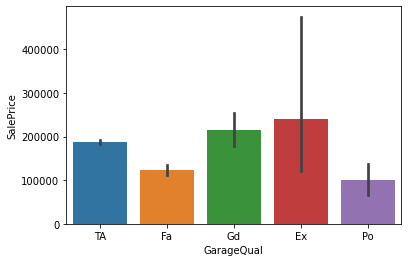

In [16]:
sns.barplot(data=df_buffer, y='SalePrice', x='GarageQual');

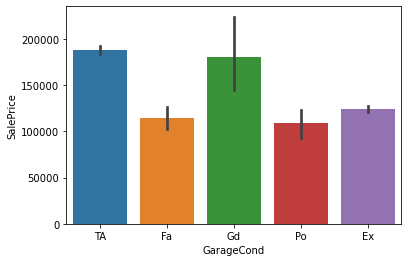

In [17]:
sns.barplot(data=df_buffer, y='SalePrice', x='GarageCond');

In [18]:
df_buffer = df[['PoolQC', 'SalePrice']]

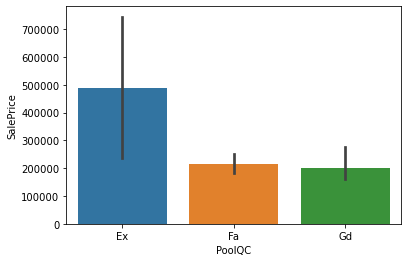

In [19]:
sns.barplot(data=df_buffer, y='SalePrice', x='PoolQC');

In [20]:
df_buffer = df[['Neighborhood', 'SalePrice']]

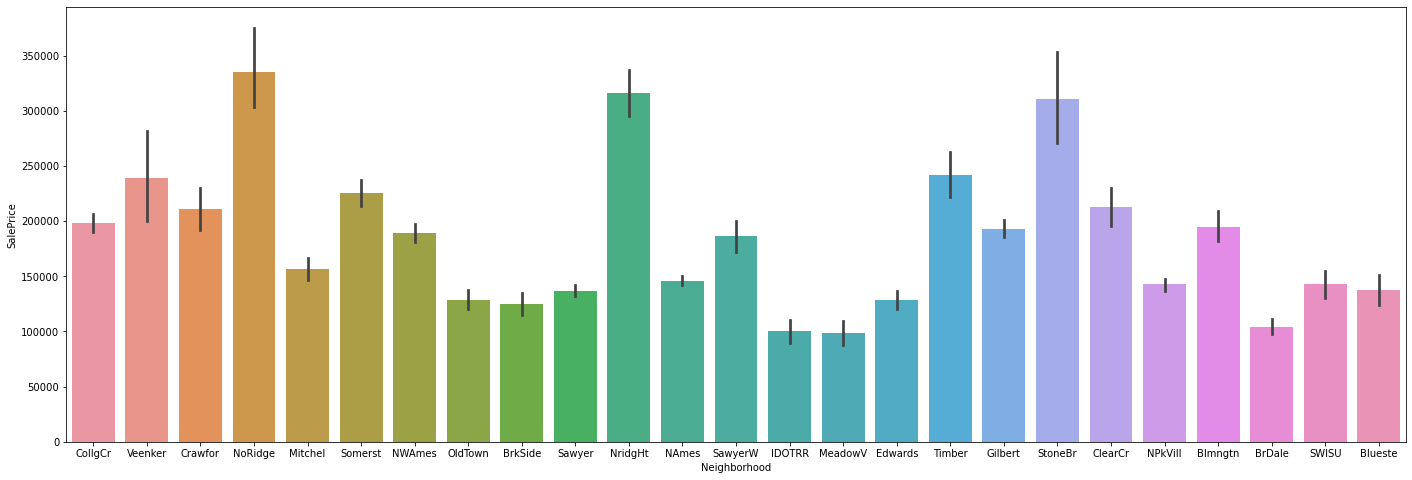

In [21]:
plt.figure(figsize=(24,8))

sns.barplot(data=df_buffer, y='SalePrice', x='Neighborhood');

**R:** A variável dependente ``SalePrice`` tem uma correlação bem considerável com os atributos numéricos contínuos de área e ano de construção ou reforma, o que reflete no tamanho e da idade/estado do imóvel. Entretanto, as variáveis qualitativas tem um perfil mais diferenciado; as que qualificam cômodo, recinto ou algum outro atributo, nem sempre refletem em maior preço diretamente, pois a priori, uma qualificação excelente (``Ex``), como aparece no dataset, por exemplo, o lugar comum nos faz pensar que faz subir o preço do imóvel, o que parece não acontecer em todos os atributos que utilizam este tipo de avaliação. Outras varáveis como localização ou acabamento que aparecem no dataset, precisam de algum tipo de consulta com a equipe de vendas/avaliação para que possamos avaliar melhor o efeito no preço de casas.

## 2. Levantamento de hipóteses (1.0 ponto)
Descreva quais hipóteses você observou ao fazer a análise exploratória de dados.

**R:** A análise exploratória do dataset indica que o preço do imóvel é muito correlacionado com área construída do imóvel, idade, tempo desde a última reforma e suas características como número de recintos/quartos. Quanto à localização, um fator que geralmente influi muito no preço do imóvel, é possível notar preços médios maiores em vizinhanças específicoas como Northridge, North Ames e Stone Brook.

## 3. Apresentação das ideias obtidas (1.0 ponto)
Apresente com gráficos as suas observações e a descreva cada gráfico.

O gráfico a seguir contém atributos contínuos e discretos que apresentam valores de correlação entre ``0,3`` a ``0,99`` com a variável target ``SalePrice``. São elas em ordem decrescente:

1. OverallQual
2. GrLivArea
3. GarageCars
4. GarageArea
5. TotalBsmtSF
6. 1stFlrSF
7. FullBath
8. TotRmsAbvGrd
9. YearBuilt
10. YearRemodAdd
11. GarageYrBlt
12. MasVnrArea
13. Fireplaces
14. BsmtFinSF1
15. LotFrontage
16. WoodDeckSF
17. 2ndFlrSF
18. OpenPorchSF

Variáveis contínuas estão representadas por scatterplot e podemos notar a tendência de alta conforme o valor da variável horizontal aumenta, ``SalePrice``, representado na vertical, também aumenta.
As variáveis discretas por sua vez, estão representadas em barplot. Nos gráficos também é possível notar uma tendência de alta de ``SalePrice``.

In [22]:
df_buffer = df[buffer_labels]

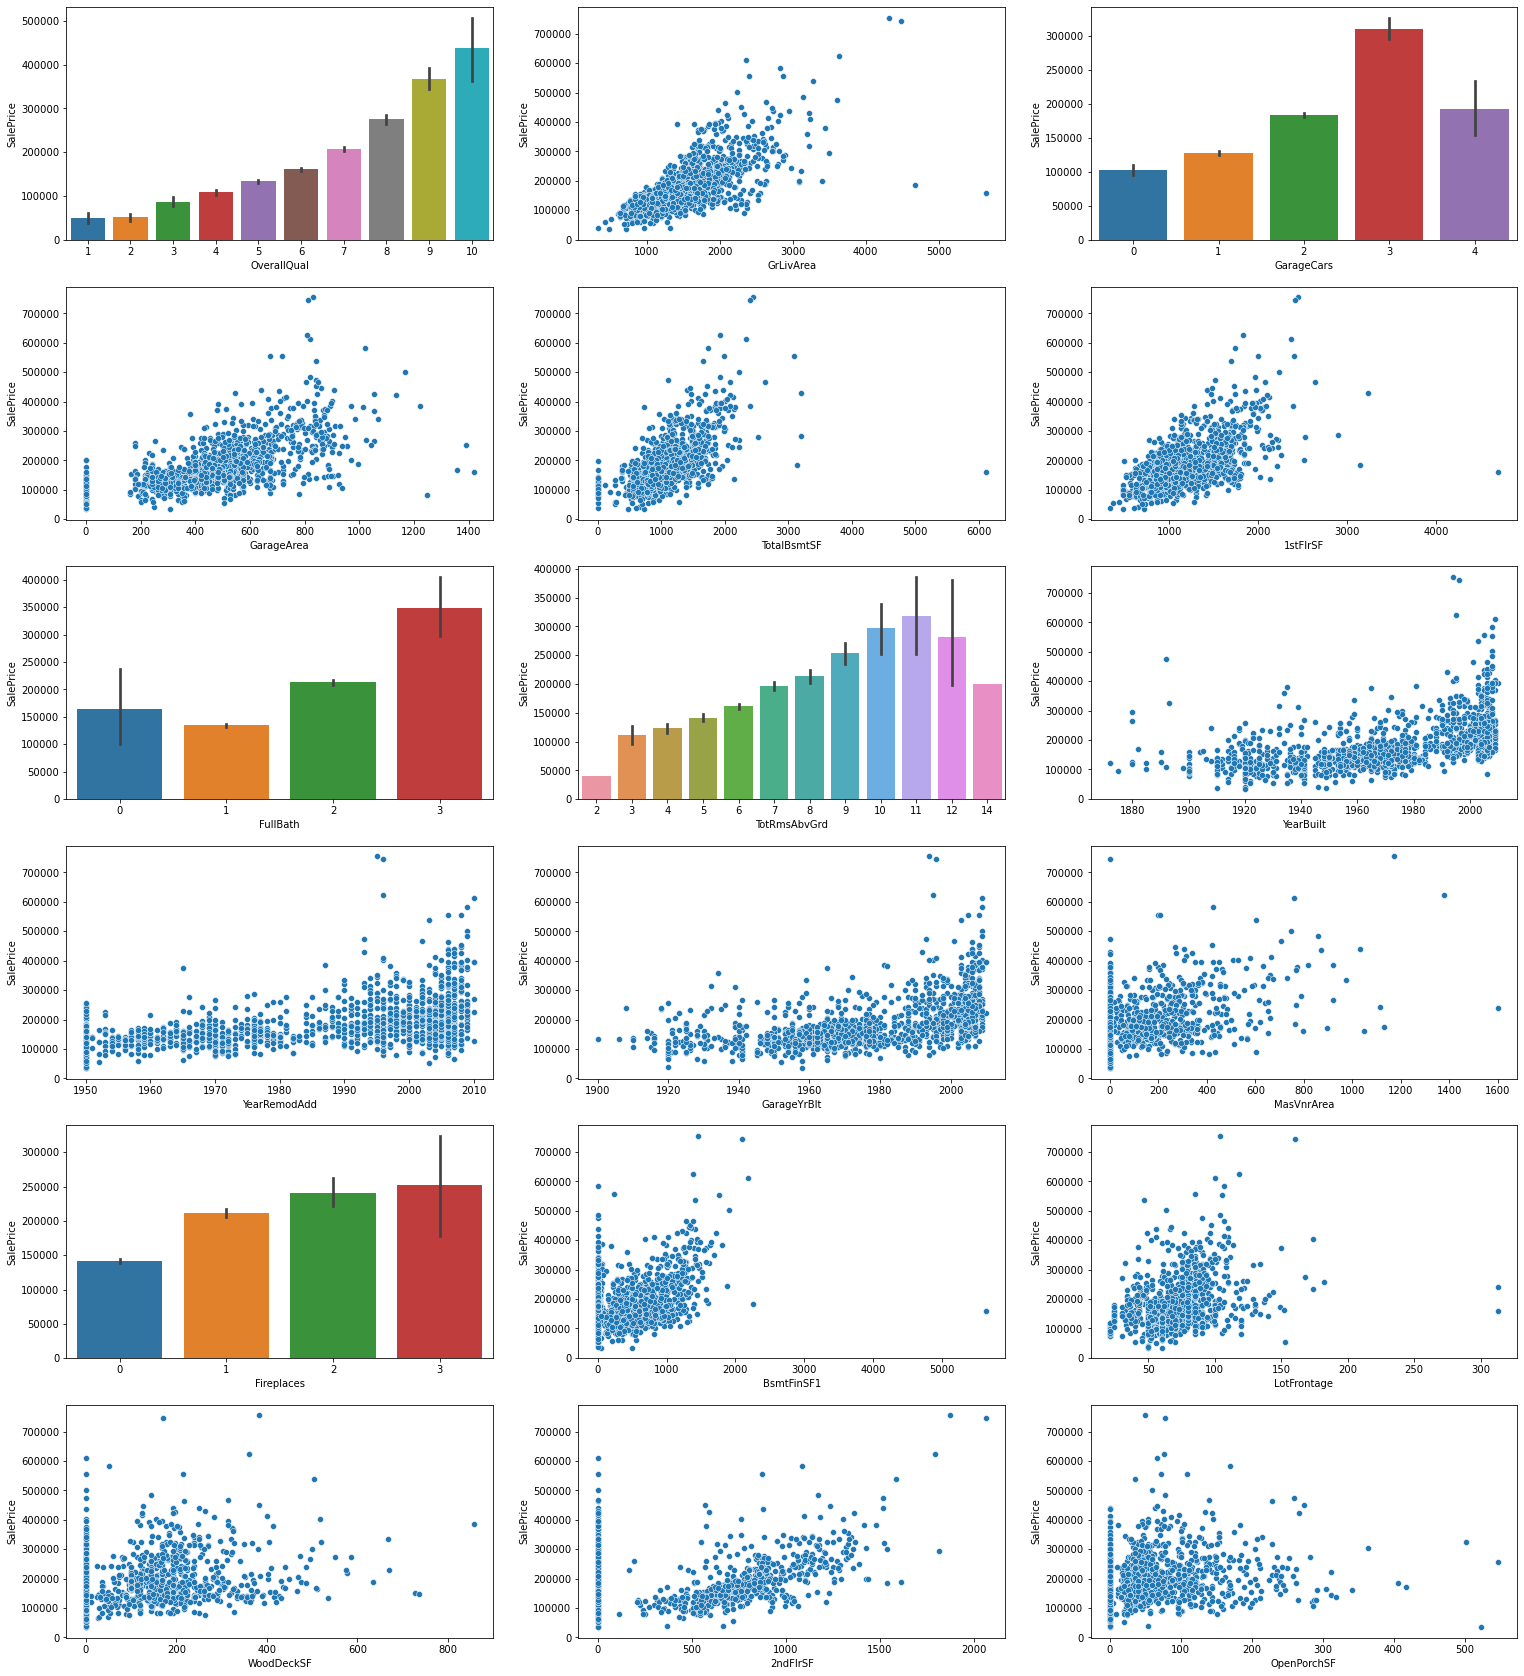

In [23]:
plt.figure(figsize=(26,30))

plt.subplot(6,3,1)
sns.barplot(data=df_buffer, x='OverallQual', y='SalePrice')

plt.subplot(6,3,2)
sns.scatterplot(data=df_buffer, x='GrLivArea', y='SalePrice')

plt.subplot(6,3,3)
sns.barplot(data=df_buffer, x='GarageCars', y='SalePrice')

plt.subplot(6,3,4)
sns.scatterplot(data=df_buffer, x='GarageArea', y='SalePrice')

plt.subplot(6,3,5)
sns.scatterplot(data=df_buffer, x='TotalBsmtSF', y='SalePrice')

plt.subplot(6,3,6)
sns.scatterplot(data=df_buffer, x='1stFlrSF', y='SalePrice')

plt.subplot(6,3,7)
sns.barplot(data=df_buffer, x='FullBath', y='SalePrice')

plt.subplot(6,3,8)
sns.barplot(data=df_buffer, x='TotRmsAbvGrd', y='SalePrice')

plt.subplot(6,3,9)
sns.scatterplot(data=df_buffer, x='YearBuilt', y='SalePrice')

plt.subplot(6,3,10)
sns.scatterplot(data=df_buffer, x='YearRemodAdd', y='SalePrice')

plt.subplot(6,3,11)
sns.scatterplot(data=df_buffer, x='GarageYrBlt', y='SalePrice')

plt.subplot(6,3,12)
sns.scatterplot(data=df_buffer, x='MasVnrArea', y='SalePrice')

plt.subplot(6,3,13)
sns.barplot(data=df_buffer, x='Fireplaces', y='SalePrice')

plt.subplot(6,3,14)
sns.scatterplot(data=df_buffer, x='BsmtFinSF1', y='SalePrice')

plt.subplot(6,3,15)
sns.scatterplot(data=df_buffer, x='LotFrontage', y='SalePrice')

plt.subplot(6,3,16)
sns.scatterplot(data=df_buffer, x='WoodDeckSF', y='SalePrice')

plt.subplot(6,3,17)
sns.scatterplot(data=df_buffer, x='2ndFlrSF', y='SalePrice')

plt.subplot(6,3,18)
sns.scatterplot(data=df_buffer, x='OpenPorchSF', y='SalePrice');

In [24]:
df_buffer = df[['GarageQual', 'GarageCond', 'ExterQual', 'SalePrice', 'PoolQC']]

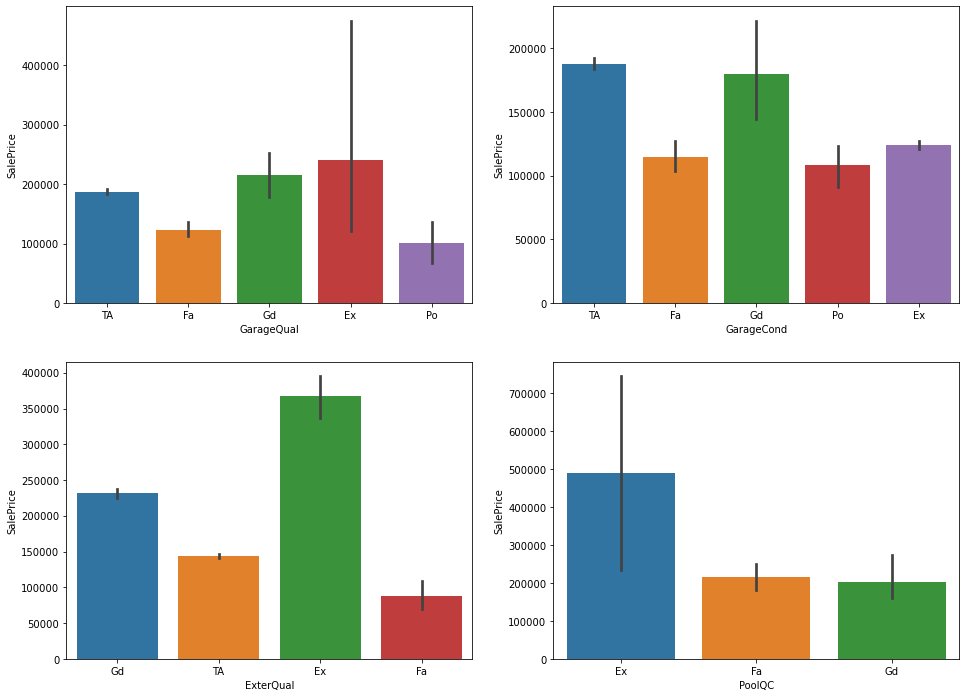

In [25]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.barplot(data=df_buffer, y='SalePrice', x='GarageQual')
plt.subplot(2,2,2)
sns.barplot(data=df_buffer, y='SalePrice', x='GarageCond')
plt.subplot(2,2,3)
sns.barplot(data=df_buffer, y='SalePrice', x='ExterQual')
plt.subplot(2,2,4)
sns.barplot(data=df_buffer, y='SalePrice', x='PoolQC');

O gráfico acima representa o preço de venda dos imóveis em relação a alguns atributos qualitativos. São eles: 
- GarageQual
- GarageCond
- ExterQual
- PoolQC

Note que nem sempre atributos qualificados de maneira melhor, tem preços mais altos. Note-se que uma ``GarageCond`` excelente (``Ex``) possui preço menor do que as classificadas como ``TA``

A seguir, o gráfico representa o preço médio por ``Neighborhood``, de onde podemos tirar os bairros mais valorizados.

In [26]:
df_buffer = df[['Neighborhood', 'SalePrice']]

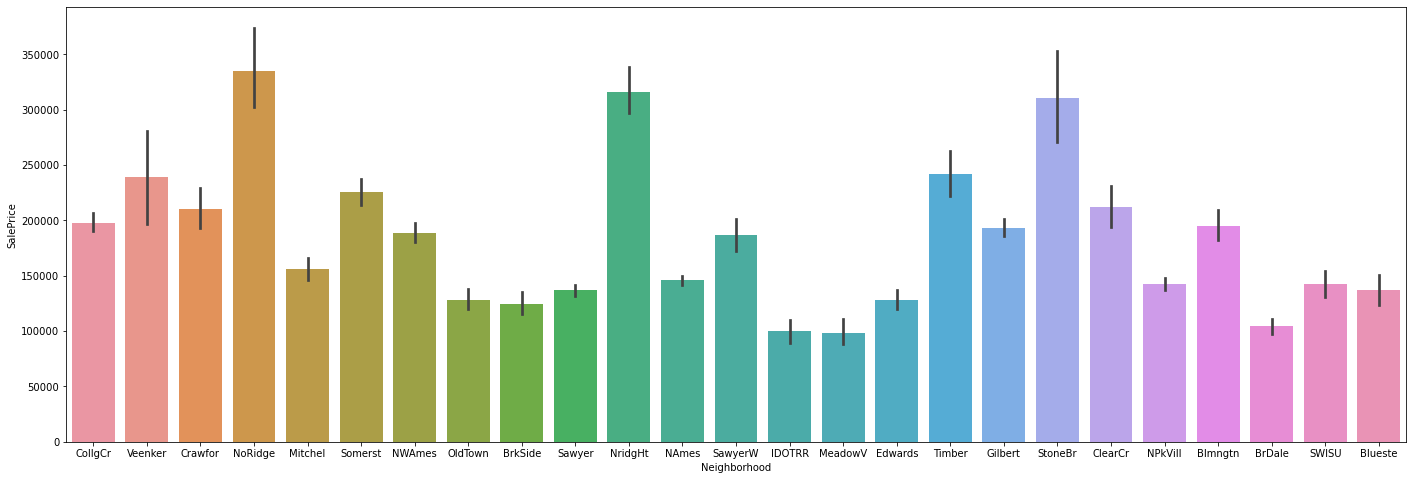

In [27]:
plt.figure(figsize=(24,8))

sns.barplot(data=df_buffer, y='SalePrice', x='Neighborhood');

## 4. Preparação dos dados (1.0 ponto)
Faça um processamento nos dados, preenchendo valores faltantes, removendo dados ou variáveis inconsistentes e normalizado os dados

Limpeza de NaN's:

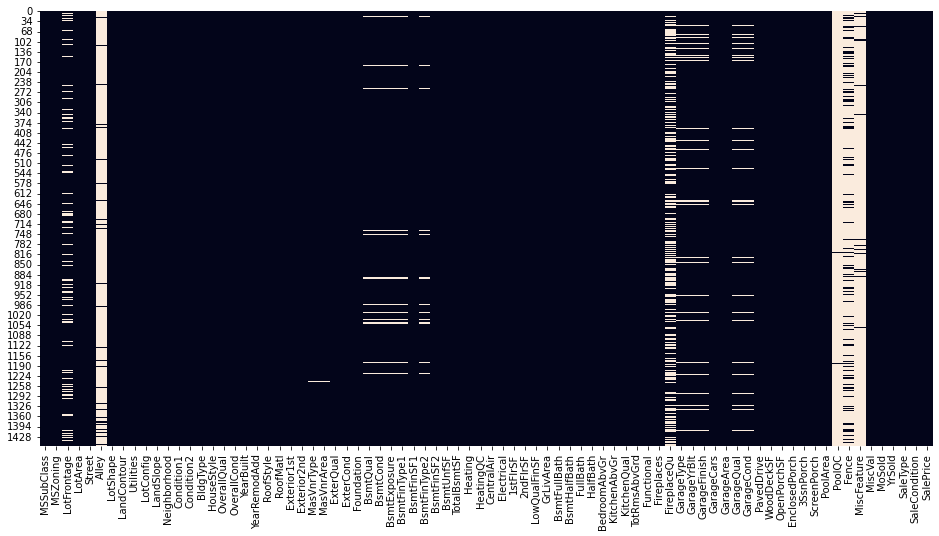

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(data = df.isna(), cbar=False);

In [29]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

primeiro, eliminaremos algumas colunas  que tem visivelmente muitos NaN's

In [30]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Verificando casos de NaN's

In [31]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Temos 259 NaN's em ``LotFrontage``

In [32]:
df['LotFrontage'].isna().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

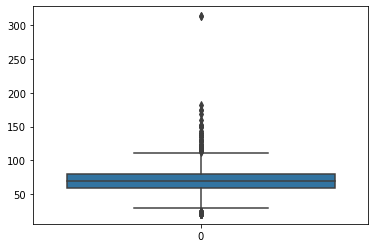

In [33]:
sns.boxplot(data=df['LotFrontage']);

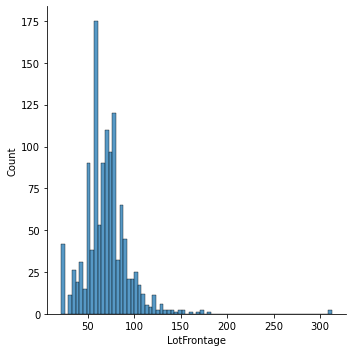

In [34]:
sns.displot(data=df['LotFrontage'])

Média e mediana estão bem próximas.

In [35]:
print('média: ', df.LotFrontage.mean())
print('mediana: ', df.LotFrontage.median())

média:  70.04995836802665
mediana:  69.0


Usaremos a mediana para preencher os valores faltantes.

In [36]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

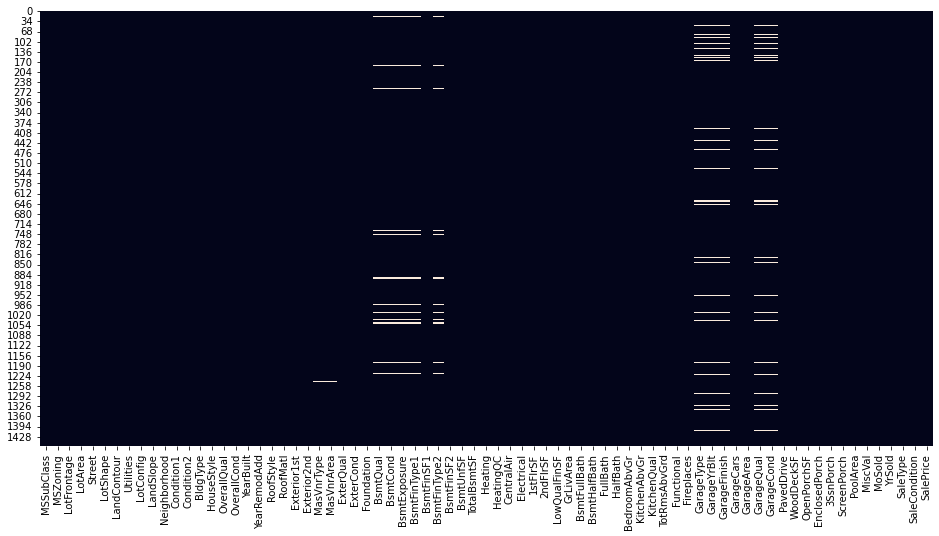

In [37]:
plt.figure(figsize=(16,8))
sns.heatmap(data = df.isna(), cbar=False);

Hora de verificar o atributo ``MasVnrType``:

In [38]:
df[['MasVnrType']].isna().value_counts()

MasVnrType
False         1452
True             8
dtype: int64

In [39]:
df[df['MasVnrType'].isna() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


In [40]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [41]:
df['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [42]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Verificando o dicionário de dados, ``MasVnrType`` está relacionada a ``MasVnrArea``. Usaremos ``0`` para preencher os dados faltantes de ``MasVnrArea`` e então, para manter coerência, ``MasVnrType`` será preenchido com ``None``

In [43]:
df['MasVnrArea'].fillna(0, inplace=True)

In [44]:
df['MasVnrType'].fillna('None', inplace=True)

Verificando NaN's em variáveis relacionadas ao porão:

In [45]:
df['BsmtQual'].isna().value_counts()

False    1423
True       37
Name: BsmtQual, dtype: int64

In [46]:
df[df['BsmtQual'].isna()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,69.0,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,0,7,2008,WD,Normal,134432


É um caso parecido com o anterior. Consideraremos que os imóveis com NaN neste atributo não possuem porão e preencheremos todas as variáveis relacionadas com ``NA``, seguindo o dicionário de dados.

In [47]:
df_buffer = df[['BsmtQual', 'BsmtCond',	'BsmtExposure',	'BsmtFinType1', 'BsmtFinType2']].fillna('NA')
df[['BsmtQual', 'BsmtCond',	'BsmtExposure',	'BsmtFinType1', 'BsmtFinType2']] = df_buffer

In [48]:
df['GarageType'].isna().value_counts()

False    1379
True       81
Name: GarageType, dtype: int64

In [49]:
df[df['GarageType'].isna()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NA,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,0,12,2008,WD,Normal,122000
1407,20,RL,69.0,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,3,2009,WD,Normal,112000
1449,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000


Mesmo caso anterior. Usaremos a mesma estratégia e considerar os imóveis com NaN neste atributo, como casa sem garagem e preencher com o valor ``NA``, seguindo o dicionário de dados.

In [50]:
df_buffer = df[['GarageType', 'GarageQual',	'GarageCond', 'GarageFinish']].fillna('NA')
df[['GarageType', 'GarageQual',	'GarageCond', 'GarageFinish']] = df_buffer

In [51]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Droparemos o atributo ``GarageYrBlt`` pois seus valores são ano de construção da garagem, dado difícil de preencher com algum valor como média, mediana, etc pois os NaN's neste atributo representam imóveis sem garagem e atribuir algum valor poderia interferir na verossimilhança do modelo de ML posteriormente.

In [52]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

Verificando lacunas na tabela:

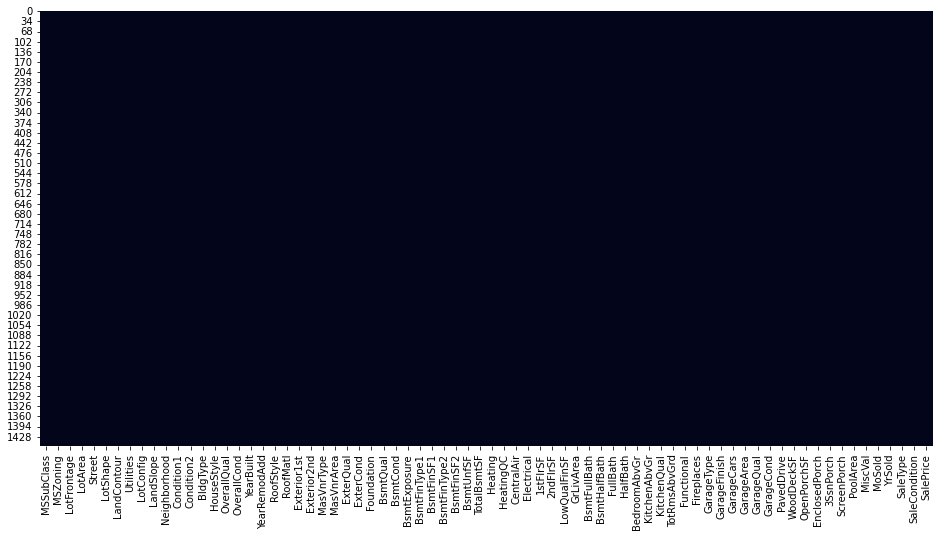

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(data = df.isna(), cbar=False);

vejamos quantos outliers temos em ``SalesPrice``

In [54]:
q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)
fiq = q3 - q1

In [55]:
inferior_limit = q1 - 1.5*fiq
superior_limit = q3 + 1.5*fiq

In [56]:
df.loc[ (df['SalePrice'] < inferior_limit) | (df['SalePrice'] > superior_limit) ]['SalePrice'].count()

61

A princípio, vamos eliminar apenas os outliers de ``SalePrice`` para minimizar a deformação que podem introduzir no modelo de ML.

In [57]:
df.drop(df.loc[ (df['SalePrice'] < inferior_limit) | (df['SalePrice'] > superior_limit) ].index, inplace=True)

## 5. Criação e seleção de características (1.0 ponto)
Observando as variáveis disponíveis, é possível criar novas variáveis? Ou trazer de um dado externo novos dados para agregar aos existentes? É possível selecionar uma variável ou grupo de variáveis que melhor explica a variável dependente?

**R:** É possível encodar os rótulos das variáveis categóricas do tipo objeto em variáveis dummies e as ordinais em variáveis numéricas ordinais.
Além de que podemos também usar informação de localização como coordenadas de longitude e latitude do atributo ``Neighborhood``, por exemplo, para termos dados numéricos, mais facilmente interpretadas pelos modelos de ML.

Há vários métodos de seleção de atributos, entretanto,  pode ser feita seguindo parâmetros, como por exemplo a correlação individual dos atributos à variável dependente. Entretanto, há métodos mais automatizados e precisos na biblioteca do ScikitLearn, como por exemplo o RFE, que é treinado com as variáveis e elimina-as recursivamente com o objetivo de obter o menor número possível de atributos com a melhor métrica possível,  resultando nas variáveis que melhor explicam os dados em questão.

Separando colunas categóricas:

- Separaremos as colunas categóricas em categoricas ordinais e não ordinais.

- As ordinais serão codificadas em números a partir de zero a n items únicos da tabela.

- O restante das colunas categóricas são de elementos não ordinais, isto é, que não apresentam hierarquia, portanto, vamos usar variáveis dummies.

In [58]:
feature_names = df.columns
df_cat_features = []
for name in feature_names:
    if df[name].dtype == 'object':
        if 'Ex' in df[name].unique() or 'Gd' in df[name].unique() or 'TA' in df[name].unique() or 'Fa' in df[name].unique() or 'Po' in df[name].unique():
            df[name] = pd.Categorical(df[name])
            df[name] = df[name].cat.codes
        else:
            df_cat_features.append(name)

df_cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [59]:
df_prepared = pd.get_dummies(data=df, columns=df_cat_features, drop_first=True)
df_prepared.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,2,4,2,4,4,706,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,0,2,548,5,5,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,4,2,4,1,978,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,2,460,5,5,298,0,0,0,0,0,0,5,2007,

## 6. Decisão do modelo (1.0 ponto)
Dada toda a análise realizada nos pontos anteriores, qual modelo melhor se adequa a este problema? E por quê?

Dada a alta quantidade de atributos independentes, a primeira vista, seria necessário algum algoritmo robusto para o número alto de atributos, o que nos leva a pensar em regressão por ávores de decisão. Entretanto, para atingir resultados mais robustos, usaremos modelo de aprendizado por agrupamento: Light GBM e Random Forest por usarem modelos de ávore de decisão por padrão e compararemos as métricas para então decidirmos pelo modelo. Desde

A métrica principal será a de R² pois é a que melhor representa o desempenho do modelo. Como desempate usaremos o MAE.

## 7. Modelagem (1.0 ponto)
Divida os dados em teste e treino, construa o seu modelo e teste alterar os parâmetros utilizados por ele.

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

In [61]:
scaler = MinMaxScaler()
y = df['SalePrice']

In [62]:
r2_m = []
mae_m = []
mse_m = []
features_m = []
n_features =[]
models = []

In [63]:
l_r2 = []
n = 1

while n<len(df_prepared.columns):
    lgbm_reg = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=150, random_state=42)

    X = df_prepared.drop(['SalePrice'], axis=1)
    X_std = scaler.fit_transform(X)

    selector = RFE(lgbm_reg, n_features_to_select=n, step=1)
    selector = selector.fit(X_std, y)

    X_new = X[X.columns[selector.support_]]
    X_std = scaler.fit_transform(X_new)
    X_test, X_train, y_test, y_train = train_test_split(X_std, y, test_size=0.3, random_state=42)

    lgbm_reg.fit(X_train, y_train)
    y_pred = lgbm_reg.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    if l_r2 == [] or r2 > l_r2[-1] or r2-l_r2[-1] > .01:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        features = ', '.join(list(X.columns[selector.support_]))
        
        models.append('LightGBM')
        r2_m.append(r2)
        mae_m.append(mae)
        mse_m.append(mse)
        features_m.append(features)
        l_r2.append(r2)
        n_features.append(n)
        n += 1
        continue    
    else:
        break

In [64]:
l_r2 = []
n = 1

while n<len(df_prepared.columns):
        rf_reg = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42)
    
        X = df_prepared.drop(['SalePrice'], axis=1)
        X_std = scaler.fit_transform(X)
    
        selector = RFE(rf_reg, n_features_to_select=n, step=1)
        selector = selector.fit(X_std, y)
        
        X_new = X[X.columns[selector.support_]]
        X_std = scaler.fit_transform(X_new)
        X_test, X_train, y_test, y_train = train_test_split(X_std, y, test_size=0.3, random_state=42)

        rf_reg.fit(X_train, y_train)
        y_pred = rf_reg.predict(X_test)
    
        r2 = r2_score(y_test, y_pred)
        
        if l_r2 == [] or r2 > l_r2[-1] or r2-l_r2[-1] > .0005:
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                features = ', '.join(list(X.columns[selector.support_]))

                models.append('RandomForest')
                r2_m.append(r2)
                mae_m.append(mae)
                mse_m.append(mse)
                features_m.append(features)
                n_features.append(n)

                l_r2.append(r2)
                n += 1
                continue    
        else:
                break

## 8. Histórico (1.0 pontos)
Preencha a tabela abaixo com cada teste realizado com seu modelo (coloque vazio se a métrica não se aplica). Não se preocupe caso voce mude de ideia sobre qual modelo testar, mas não deixe de testá-lo exaustivamente e, caso precise, retorne para o passo de criação e seleção de características.

In [65]:
df_metrics = pd.DataFrame({'Modelo': models, 'No. Atributos': n_features, 'Atributos': features_m, 'R²': r2_m, 'Erro Médio Absoluto': mae_m, 'Erro Médio Quadrático': mse_m })
df_metrics

,Modelo,No. Atributos,Atributos,R²,Erro Médio Absoluto,Erro Médio Quadrático
0,LightGBM,1,GrLivArea,0.467211,33343.342661,1.928908e+09
1,LightGBM,2,"YearBuilt, GrLivArea",0.691478,24436.647809,1.116974e+09
2,LightGBM,3,"OverallCond, YearBuilt, GrLivArea",0.724484,22700.414374,9.974792e+08
3,LightGBM,4,"OverallCond, YearBuilt, TotalBsmtSF, GrLivArea",0.794441,19654.581121,7.442065e+08
4,LightGBM,5,"LotArea, OverallCond, YearBuilt, TotalBsmtSF, ...",0.807211,19082.591693,6.979729e+08
5,LightGBM,6,"LotArea, OverallCond, YearBuilt, BsmtFinSF1, T...",0.816120,18382.737227,6.657203e+08
6,LightGBM,7,"LotArea, OverallQual, OverallCond, YearBuilt, ...",0.846452,16817.761530,5.559046e+08
7,RandomForest,1,OverallQual,0.628260,27640.761999,1.345846e+09
8,RandomForest,2,"OverallQual, GrLivArea",0.708582,24493.974505,1.055048e+09
9,RandomForest,3,"OverallQual, TotalBsmtSF, GrLivArea",0.777834,21171.206488,8.043303e+08


In [67]:
df_metrics.iloc[df_metrics['R²'].idxmax()]

Modelo                                                            LightGBM
No. Atributos                                                            7
Atributos                LotArea, OverallQual, OverallCond, YearBuilt, ...
R²                                                                0.846452
Erro Médio Absoluto                                            16817.76153
Erro Médio Quadrático                                     555904584.124877
Name: 6, dtype: object

In [66]:
df_metrics.Atributos[df_metrics['R²'].idxmax()]

'LotArea, OverallQual, OverallCond, YearBuilt, BsmtFinSF1, TotalBsmtSF, GrLivArea'

## 9. Resultado (2.0 pontos)
Reúna os seus achados, os valores das métricas do seu melhor modelo obtido e o melhor conjunto de variáveis. Escreva abaixo um relatório que seria enviado para uma diretoria de uma empresa sobre seu trabalho.

Prezada diretoria,

Os dados coletados são extremamente detalhados e através deles chegamos aos seguintes insights:

1- Em primeiro lugar, a área do imóvel, idade e tempo da última reforma tem grande influência na determinação de seu preço de venda.

2- A condição do imóvel quantificada e ranqueada (como por exemplo, poor, average, goog, excellent, etc.) se demonstrou um atributo bem significante na hora de definir o preço de venda.

Foram testados 4 tipos de algoritmos e o melhor deles teve uma métrica de ajuste de 84.64% (modelo LightGBM).
Os atributos que melhor definem os preços de venda dos imóveis segundo nosso modelo de maior desempenho são as seguintes:
- LotArea: área total do terreno
- OverallQual: qualidade geral do imóvel
- OverallCond: condições gerais do imóvel
- YearBuilt:  ano de construção
- BsmtFinSF1: área de acabamento em pés-quadrados do tipo 1 do porão
- TotalBsmtSF: área total do porão
- GrLivArea: área contruída acima do chão

Entendemos que muitas casas não terão porão, e neste modelo esses imóveis terão valor depreciado. Isto é devido a um provável desbalancemanto do dataset em que há muito mais casas com porão do que sem.

Recomendo o modelo para uso de uma estimativa para estimar uma base do preço de venda do imóvel mas uma visita ao local ainda será necessária a fim de avaliar o imóvel mais precisamente.

Ficarei à disposição para qualquer dúvida.

Att, FW.